<a href="https://colab.research.google.com/github/MohitJain7824/Airbnb/blob/main/Final_of_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - AirBnb Booking Analysis**

Project Type - EDA/Regression/Classification/Unsupervised
Contribution - Individual/Team
Name- Mohit Jain

## Project Summary -

Here we are using the Airbnb booking dataset. With the Help of this dataset we found some insights. Which tells which type of rooms are booked most & people from specific locations prefer which type of rooms. Also we find the revenue generation from each type of rooms.

## GitHub Link -

https://github.com/MohitJain7824/Airbnb/tree/main

# **Problem Statement**

1. Which type of room booked most.
2. how many people belongs to which neighbourhood group
3. Finding the price range of bookings
4. Finding, people belongs to which neighbourhood group prefer which type of room
5. Revenue Generated by Room type


# **Code Starts from Here:-**

Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [4]:
df=pd.read_csv("/content/Airbnb NYC 2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Calculating Revenue and adding the new column in Dataset

Frequency of Room Booked 

In [6]:
room_type1 = df.room_type.value_counts()
df_room_type = pd.DataFrame(room_type1)

In [7]:
df_room_type

,room_type
Entire home/apt,25409
Private room,22326
Shared room,1160


Vizualization of Room Booked

Text(0.5, 1.0, 'Distribution by Room type')

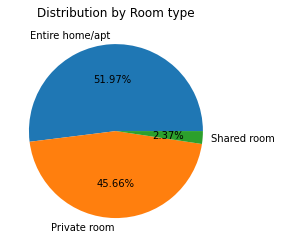

In [8]:
plt.pie(df_room_type.room_type,labels=df_room_type.index,autopct="%0.2f%%",radius=1)
plt.title("Distribution by Room type")

value counts by neighbourhood group

In [9]:
df_neighbourhood_group=pd.DataFrame(df.neighbourhood_group.value_counts())
df_neighbourhood_group

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


Vizualization to see how many people belongs to which neighbourhood group

<BarContainer object of 5 artists>

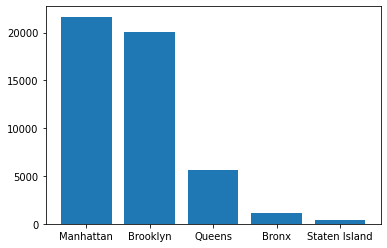

In [10]:
plt.bar(df_neighbourhood_group.index,df_neighbourhood_group.neighbourhood_group)

Finding the price range of bookings

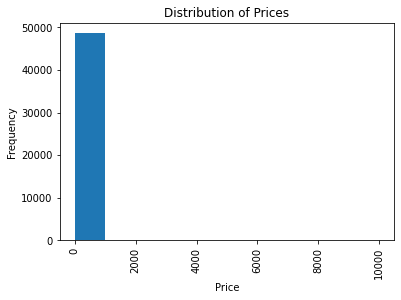

In [11]:
plt.hist(df.price)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()

Finding, people belongs to which neighbourhood group prefer which type of room

In [12]:
df1=df[["neighbourhood_group","room_type"]]
df1

,neighbourhood_group,room_type
0,Brooklyn,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Private room
3,Brooklyn,Entire home/apt
4,Manhattan,Entire home/apt
...,...,...
48890,Brooklyn,Private room
48891,Brooklyn,Private room
48892,Manhattan,Entire home/apt
48893,Manhattan,Shared room


In [13]:
my_dict=dict(zip(df.neighbourhood_group,df.room_type))
my_dict

{'Brooklyn': 'Private room',
 'Manhattan': 'Private room',
 'Queens': 'Private room',
 'Staten Island': 'Private room',
 'Bronx': 'Entire home/apt'}

Private room prefered by which neighbourhood group

In [14]:
private_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Private room").sum()).reset_index(name="count")

Vizualization

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

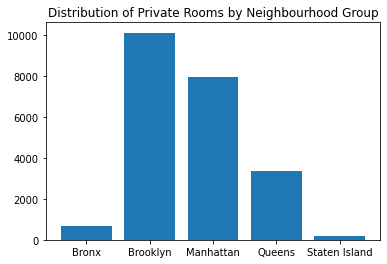

In [15]:
plt.bar(private_rooms['neighbourhood_group'],private_rooms['count'])
plt.title("Distribution of Private Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

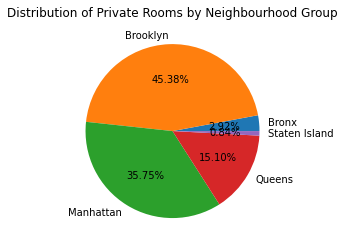

In [16]:
plt.pie(private_rooms['count'],labels=private_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Private Rooms by Neighbourhood Group")

Shared room prefered by which neighbourhood group

In [17]:
shared_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Shared room").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

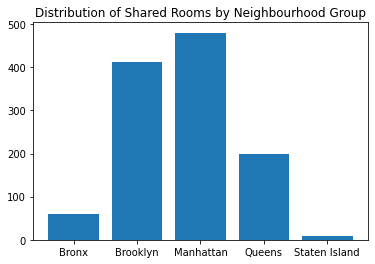

In [18]:
plt.bar(shared_rooms['neighbourhood_group'],shared_rooms['count'])
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

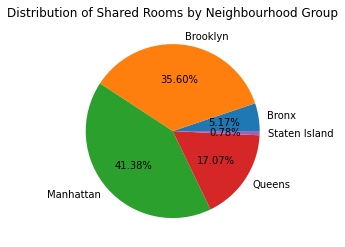

In [19]:
plt.pie(shared_rooms['count'],labels=shared_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

Entire Home/apt prefered by which neighbourhood group

In [20]:
entire_home=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Entire home/apt").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

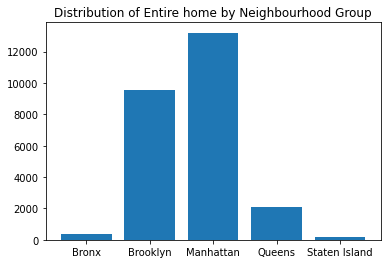

In [21]:
plt.bar(entire_home['neighbourhood_group'],entire_home['count'])
plt.title("Distribution of Entire home by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

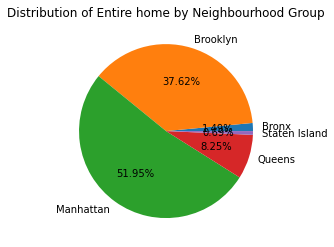

In [22]:
plt.pie(entire_home['count'],labels=entire_home['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Entire home by Neighbourhood Group")

Revenue Generation

In [25]:
df['revenue']=df.price*df.minimum_nights
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800


Total Revenue

In [26]:
df.revenue.sum()

62802340

Revenue by Room type

In [27]:
revenue=df.groupby('room_type')['revenue'].sum()
revenue=pd.DataFrame(revenue)
revenue

,revenue
room_type,
Entire home/apt,47981638
Private room,14357673
Shared room,463029


Vizualization

Text(0.5, 1.0, 'Distribution of Revenue by Room type')

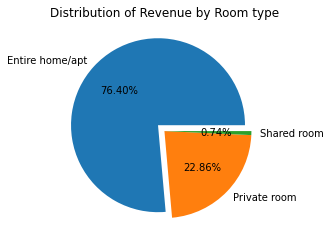

In [28]:
plt.pie(revenue.revenue,labels=revenue.index,autopct='%0.2f%%',explode=[0.1,0,0])
plt.title("Distribution of Revenue by Room type")

# **Conclusion**


1.  The most used rooms are Entire home/apt type.
2.  Entire home/apt rooms Generated most of revenue.
3.  People belongs to Manhattan Used AirBnb most.
4.  Mostly Private rooms are used by Brooklyn Neighbourhood
5.  Mostly Entire home rooms are used by Manhattan Neighbourhood
6.  Mostly Shared rooms are used by Manhattan Neighbourhood